<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/NN/Age_and_Gender_Detection_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Age and Gender Detection Using Deep Learning

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = r"/content/drive/MyDrive/Colab/Kaggle/age_gender.csv"

In [ ]:
df=pd.read_csv(path)
df1= pd.DataFrame(df)

In [ ]:
df1.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


Text(0.5, 1.0, 'Ethinicity')

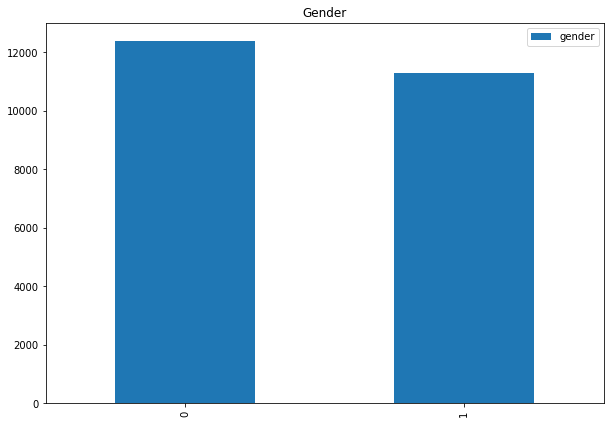

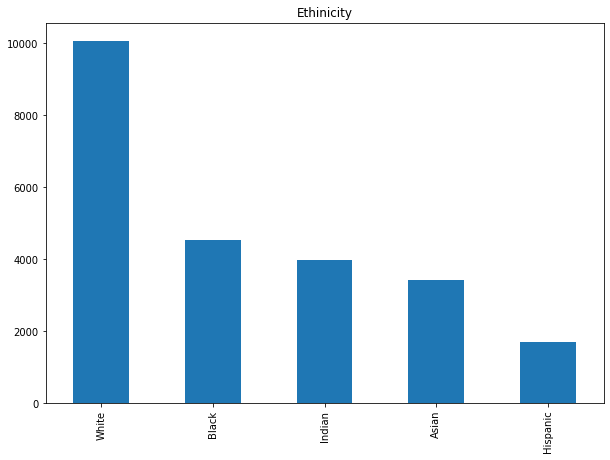

In [ ]:

plt.xlabel = 'Gender (1= Female, 0-Male)'
plt.figure(figsize=(10,7))
ax=df1.gender.value_counts().plot.bar(x='Gender (1= Female, 0-Male)', y='Count', title='Gender', legend = (1,0, ('Female', 'Male')))
plt.figure(figsize=(10,7))
labels =['White','Black','Indian','Asian','Hispanic']
ax=df1.ethnicity.value_counts().plot.bar()
ax.set_xticklabels(labels)
ax.set_title('Ethinicity')

In [ ]:
## Converting pixels into numpy array
df1['pixels'] = df1['pixels'].apply(lambda x:  np.reshape(np.array(x.split(), dtype="float32"), (48,48)))
df1.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."


In [ ]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

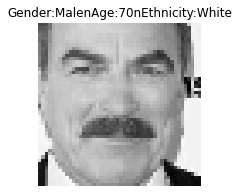

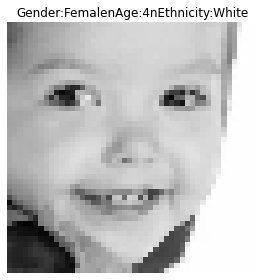

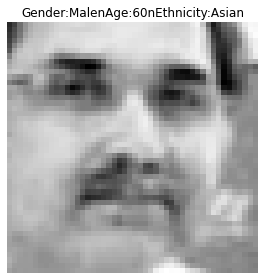

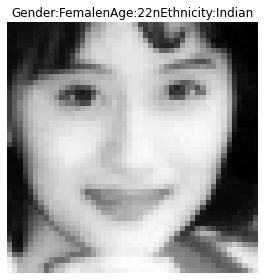

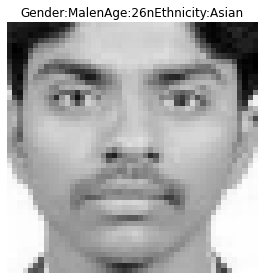

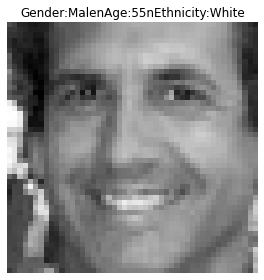

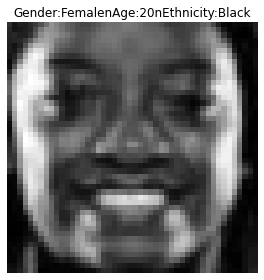

In [ ]:
gender_values_to_labels = { 1 : "Female", 0:"Male"}
eth_values_to_labels = {0:'White',1:'Black',2:'Indian',3:'Asian',4:'Hispanic'}
def plot_data(rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(cols*3,rows*4))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        fig.add_subplot(rows, cols, i) # adding sub plot
        gender = gender_values_to_labels[df.gender[k]]
        ethnicity = eth_values_to_labels[df.ethnicity[k]]
        age = df.age[k]
        im = df.pixels[k]
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.title(f'Gender:{gender}nAge:{age}nEthnicity:{ethnicity}')
        plt.tight_layout()
        plt.show()
plot_data(rows=1, cols=7, lower_value=0, upper_value=len(df))

In [ ]:
# pip install Keras-Applications
!pip install cmake
!pip install dlib
!pip install face-recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=7551a0e2074e20a29fd9fc2aea7eb18e1e77039071a69a0cb00f17fadfd21604
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
from keras_applications.resnet import ResNet50
from keras.utils.data_utils import get_file
import face_recognition

(-0.5, 47.5, 47.5, -0.5)

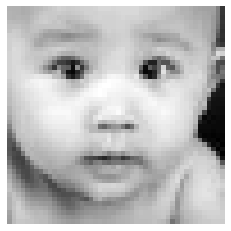

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

df=pd.read_csv(path)
# df.head()
df1= pd.DataFrame(df)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
im = df1['pixels'][0]
plt.imshow(im, cmap='gray')
plt.axis('off')

In [ ]:
df.shape

(23705, 5)

In [ ]:
X = np.zeros(shape=(23705,48,48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]



In [ ]:
X.dtype
# Output - dtype('float64')
#Age

dtype('float64')

In [ ]:
ag = df1['age']
ag=ag.astype(float)
ag= np.array(ag)
ag.shape

(23705,)

In [ ]:
eth = df1['ethnicity']
eth=eth.astype(float)
eth= np.array(eth)
eth.shape

(23705,)

In [ ]:
g= df1['gender']
g=np.array(g)
g.shape

(23705,)

In [ ]:
labels_f =[]

i=0

while i <len(ag):

  label=[]

  label.append([ag[i]])

  label.append([g[i]])

  # label.append([eth[i]])

  labels_f.append(label)

  i+=1

# Both age and gender are combined and stored in labels_f, we will further convert the list into array.

labels_f =np.array(labels_f)
labels_f.shape

(23705, 2, 1)

In [ ]:
labels_f

array([[[ 1.],
        [ 0.]],

       [[ 1.],
        [ 0.]],

       [[ 1.],
        [ 0.]],

       ...,

       [[99.],
        [ 1.]],

       [[99.],
        [ 1.]],

       [[99.],
        [ 1.]]])

In [ ]:
ag.shape

(23705,)

In [ ]:
#Splitting the data taking data set
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,labels_f,test_size=0.25)

print(X_test.shape)

print(X_train.shape)

print(Y_test.shape)

print(Y_train.shape)

(5927, 48, 48)
(17778, 48, 48)
(5927, 2, 1)
(17778, 2, 1)


In [ ]:
# Y_train_2=[Y_train[:,0]]
# Y_test_2=[Y_test[:,0]]

Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

# Y_train_2 = [Y_train[:,2],Y_train[:,1],Y_train[:,0]]
# Y_test_2 = [Y_test[:,2],Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0]

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Flatten,BatchNormalization

from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D

from tensorflow.keras.layers import Input,Activation,Add

from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam

import tensorflow as tf

def Convolution(input_tensor,filters):

    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)

    x = Dropout(0.1)(x)

    x= Activation('relu')(x)

    return x

def model(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,128)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,256)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  flatten= Flatten() (maxp_4)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  # dense_3= Dense(64,activation='relu')(flatten)

  drop_1=Dropout(0.2)(dense_1)

  drop_2=Dropout(0.2)(dense_2)
  # drop_3=Dropout(0.2)(dense_3)

  # output_3= Dense(1,activation="relu",name='eth_out')(drop_3)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)

  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  # model = Model(inputs=[inputs], outputs=[output_3,output_1,output_2])

  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",

  metrics=["accuracy"])

  return model

In [ ]:
Model=model((48,48,1))
Model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 48, 48, 32)   320         input_13[0][0]                   
__________________________________________________________________________________________________
dropout_70 (Dropout)            (None, 48, 48, 32)   0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
activation_48 (Activation)      (None, 48, 48, 32)   0           dropout_70[0][0]                 
____________________________________________________________________________________________

In [ ]:
History = Model.fit(X_train,Y_train_2, batch_size=64, validation_data=(X_test,Y_test_2), epochs=15)

Epoch 1/15
278/278 [==============================] - 5s 14ms/step - loss: 16.8659 - sex_out_loss: 0.6944 - age_out_loss: 15.9927 - sex_out_accuracy: 0.5304 - age_out_accuracy: 0.0477 - val_loss: 18.1557 - val_sex_out_loss: 0.6928 - val_age_out_loss: 17.2985 - val_sex_out_accuracy: 0.5131 - val_age_out_accuracy: 0.0459
Epoch 2/15
278/278 [==============================] - 4s 13ms/step - loss: 14.0753 - sex_out_loss: 0.6601 - age_out_loss: 13.2152 - sex_out_accuracy: 0.5955 - age_out_accuracy: 0.0478 - val_loss: 16.3088 - val_sex_out_loss: 0.5869 - val_age_out_loss: 15.4733 - val_sex_out_accuracy: 0.7297 - val_age_out_accuracy: 0.0396
Epoch 3/15
278/278 [==============================] - 4s 15ms/step - loss: 11.6881 - sex_out_loss: 0.5722 - age_out_loss: 10.8375 - sex_out_accuracy: 0.7070 - age_out_accuracy: 0.0448 - val_loss: 12.3704 - val_sex_out_loss: 0.5236 - val_age_out_loss: 11.5473 - val_sex_out_accuracy: 0.7555 - val_age_out_accuracy: 0.0454
Epoch 4/15
278/278 [=================

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 4ms/step - loss: 9.7252 - sex_out_loss: 0.3332 - age_out_loss: 8.8301 - sex_out_accuracy: 0.8417 - age_out_accuracy: 0.0459


[9.7251558303833,
 0.3332240581512451,
 8.83005142211914,
 0.8417412042617798,
 0.04589168354868889]

In [ ]:
pred=Model.predict(X_test)
pred[1]

array([[ 0.7992953],
       [18.850512 ],
       [37.970486 ],
       ...,
       [15.308779 ],
       [ 1.6071029],
       [25.309603 ]], dtype=float32)

In [ ]:
pred

[array([[5.50376  ],
        [9.137657 ],
        [8.942183 ],
        ...,
        [6.493449 ],
        [6.7081866],
        [4.3813925]], dtype=float32), array([[4.6304299e-04],
        [3.0685815e-06],
        [3.7262271e-06],
        ...,
        [1.2968140e-04],
        [8.1587219e-05],
        [1.9249172e-03]], dtype=float32), array([[0.19694842],
        [0.24601129],
        [0.22518028],
        ...,
        [0.2775994 ],
        [0.16281521],
        [0.        ]], dtype=float32)]

In [ ]:
pred[0]

array([[0.7239039 ],
       [0.45918027],
       [0.34567967],
       ...,
       [0.63135344],
       [0.62454396],
       [0.16103189]], dtype=float32)

In [ ]:
df.iloc[1980,:]

age                                                         16
ethnicity                                                    0
gender                                                       0
img_name                        20170110231553413.jpg.chip.jpg
pixels       [[0.18039216, 0.18431373, 0.22745098, 0.243137...
Name: 1980, dtype: object

In [ ]:
df.iloc[1981,:]

age                                                         16
ethnicity                                                    0
gender                                                       0
img_name                        20170110231215944.jpg.chip.jpg
pixels       [[0.3137255, 0.32156864, 0.3254902, 0.3137255,...
Name: 1981, dtype: object

[array([[0.36258054]], dtype=float32), array([[19.017597]], dtype=float32)]
Predicted Age: 19
Predicted Sex: Female


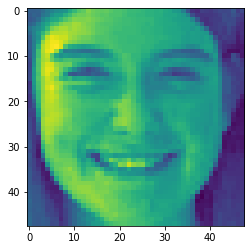

In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))
  print(pred_1)
  sex_f=['Female','Male']

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

a = test_image(1989,X, Model)

[array([[0.8141592]], dtype=float32), array([[17.736067]], dtype=float32)]
Predicted Age: 18
Predicted Sex: Male


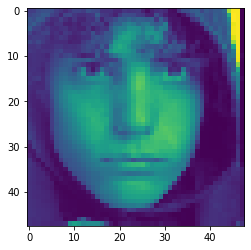

In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))
  print(pred_1)
  sex_f=['Female','Male']

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

a = test_image(1980,X, Model)

[array([[0.2857132]], dtype=float32), array([[6.4432325]], dtype=float32)]
Predicted Age: 6
Predicted Sex: Female


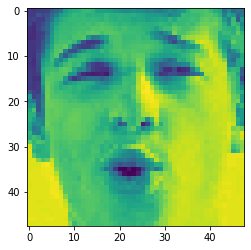

In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))
  print(pred_1)
  sex_f=['Female','Male']

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

a = test_image(1973,X, Model)

[array([[0.03062593]], dtype=float32), array([[12.987407]], dtype=float32)]
Predicted Age: 13
Predicted Sex: Female


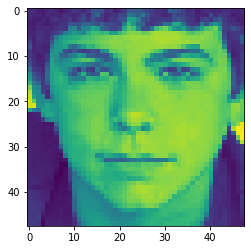

In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))
  print(pred_1)
  sex_f=['Female','Male']

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

a = test_image(1984,X, Model)